# Advance Python Modules

## Regular Expressions

In [3]:
# Regular Expressions (regex) allow us to search for general patterns in text data

Example :
user@gmail.com

We look here for "text" + "@" + "text" + ".com"

- The re library allows us to create specialized pattern strings and then search for matches within text.

**Phone Number : (555)-555-5555 <br>
Regex Pattern : r"(\d\d\d)-\d\d\d-\d\d\d\d" <br>
Using Quantifiers : r"(\d{3})-\d{3}-\d{4}"**

In [15]:
text = "The Agen's phone number is 408-855-1234. Call Soon!"

In [17]:
'phone' in text

True

In [19]:
import re

In [21]:
pattern = 'phone'

In [23]:
re.search(pattern,text)

<re.Match object; span=(11, 16), match='phone'>

In [25]:
pattern = 'Not in text'

In [27]:
re.search(pattern,text)

In [29]:
pattern = 'phone'

In [33]:
match = re.search(pattern,text)

In [35]:
match

<re.Match object; span=(11, 16), match='phone'>

In [39]:
match.span()

(11, 16)

In [41]:
match.start()

11

In [43]:
match.end()

16

In [45]:
text = 'My phone once, my phone twice'

In [51]:
match = re.search(pattern,text)

In [53]:
match

<re.Match object; span=(3, 8), match='phone'>

In [57]:
# It gives only the first occurence

In [59]:
# Instead use findall to get all matches

In [63]:
matches = re.findall(pattern,text)

In [79]:
matches

['phone', 'phone']

In [81]:
for match in re.finditer(pattern,text):
    print(match)

<re.Match object; span=(3, 8), match='phone'>
<re.Match object; span=(18, 23), match='phone'>


In [83]:
for match in re.finditer(pattern,text):
    print(match.span())

(3, 8)
(18, 23)


In [85]:
for match in re.finditer(pattern,text):
    print(match.group())

phone
phone


### Identifiers for Characters in Patterns
Characters such as a digit or a single string have different codes that represent them. You can use these to build up a pattern string. Notice how these make heavy use of the backwards slash \ . Because of this when defining a pattern string for regular expression we use the format:

r'mypattern'
placing the r in front of the string allows python to understand that the \ in the pattern string are not meant to be escape slashes.

Below you can find a table of all the possible identifiers:

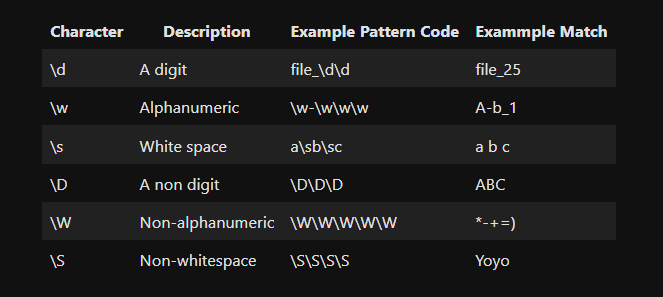


In [95]:
text = 'My phone number is 408-555-1234' 

In [103]:
phone = re.search('408-555-1234',text)

In [105]:
phone

<re.Match object; span=(19, 31), match='408-555-1234'>

In [107]:
pattern = r'\d\d\d-\d\d\d-\d\d\d\d'

In [109]:
phone = re.search(pattern,text)

In [111]:
phone

<re.Match object; span=(19, 31), match='408-555-1234'>

In [113]:
phone.group()

'408-555-1234'

## Quantifiers
Now that we know the special character designations, we can use them along with quantifiers to define how many we expect

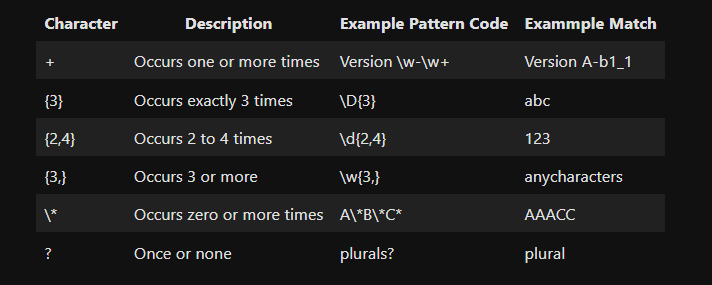.

In [125]:
# We use quantifiers to number the terms so as not to write huge strings

In [127]:
pattern = r"\d{3}-\d{3}-\d{4}"

In [129]:
phone = re.search(pattern,text)

In [131]:
phone

<re.Match object; span=(19, 31), match='408-555-1234'>

In [133]:
phone.group()

'408-555-1234'

In [135]:
phone_pattern = re.compile(r'(\d{3})-(\d{3})-(\d{4})')

In [137]:
results = re.search(phone_pattern,text)

In [139]:
results.group()

'408-555-1234'

In [143]:
results.group(1) # indexing from 1

'408'

In [146]:
results.group(2)

'555'

In [148]:
results.group(3)

'1234'

In [150]:
results.group(4)

IndexError: no such group

## Additional Regex Syntax

In [154]:
re.search(r'cat','The cat is here')

<re.Match object; span=(4, 7), match='cat'>

In [156]:
re.search(r'cat','The dog is here')

In [162]:
# pipe operator : | works as an Or operator 

In [176]:
re.search(r'cat|dog','The dog is here')

<re.Match object; span=(4, 7), match='dog'>

In [178]:
# Wildcard characters

In [180]:
re.findall(r'at', 'The cat in the hat sat there.')

['at', 'at', 'at']

In [182]:
re.findall(r' .at', 'The cat in the hat sat there.')

[' cat', ' hat', ' sat']

In [184]:
re.findall(r'...at', 'The cat in the hat went splat.')

['e cat', 'e hat', 'splat']

In [187]:
# Starts With (^)

In [191]:
re.findall(r'^\d', '1 is a number')

['1']

In [195]:
re.findall(r'^\d', 'The 2 is a number')

[]

In [197]:
# It finds for the strings starting with digit

In [199]:
# Ends with ($)

In [201]:
re.findall(r'\d$', '1 is a number')

[]

In [203]:
re.findall(r'\d$', 'The number is 2')

['2']

In [205]:
# Exclusion [^]

In [208]:
phrase = 'There are 3 numbers 34 inside 5 this sentence'

In [210]:
pattern = r'[^\d]'

In [212]:
re.findall(pattern,phrase)

['T',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 ' ',
 'n',
 'u',
 'm',
 'b',
 'e',
 'r',
 's',
 ' ',
 ' ',
 'i',
 'n',
 's',
 'i',
 'd',
 'e',
 ' ',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 's',
 'e',
 'n',
 't',
 'e',
 'n',
 'c',
 'e']

In [216]:
pattern = r'[^\d]+' # To have one or more letters (words as in)

In [220]:
re.findall(pattern,phrase)

['There are ', ' numbers ', ' inside ', ' this sentence']

In [224]:
# These exclusions are useful to remove punctuations in the sentences

In [226]:
test_phrase = 'This is a string! But it has punctuation. How can we remove it ?'

In [232]:
re.findall(r'[^!.?]+',test_phrase)

['This is a string', ' But it has punctuation', ' How can we remove it ']

In [236]:
re.findall(r'[^!.? ]+',test_phrase)

['This',
 'is',
 'a',
 'string',
 'But',
 'it',
 'has',
 'punctuation',
 'How',
 'can',
 'we',
 'remove',
 'it']

In [238]:
clean = re.findall(r'[^!.?]+',test_phrase)
' '.join(clean)

'This is a string  But it has punctuation  How can we remove it '

In [240]:
# Inclusion 

In [252]:
text = 'Only find the hypen-words in this sentence. But you do not know how long-ish they are.'

In [258]:
pattern = r'[\w]+'

In [260]:
re.findall(pattern,text)

['Only',
 'find',
 'the',
 'hypen',
 'words',
 'in',
 'this',
 'sentence',
 'But',
 'you',
 'do',
 'not',
 'know',
 'how',
 'long',
 'ish',
 'they',
 'are']

In [262]:
pattern = r'[\w]+-'

In [264]:
re.findall(pattern,text)

['hypen-', 'long-']

In [266]:
pattern = r'[\w]+-[\w]+' # OR r'\w+-\w+'

In [268]:
re.findall(pattern,text)

['hypen-words', 'long-ish']

In [270]:
# Find words that start with cat and end with one of these options: 'fish','nap', or 'claw'
text = 'Hello, would you like some catfish?'
texttwo = "Hello, would you like to take a catnap?"
textthree = "Hello, have you seen this caterpillar?"

In [274]:
re.search(r'cat(fish|nap|claw)',text)

<re.Match object; span=(27, 34), match='catfish'>

In [276]:
re.search(r'cat(fish|nap|claw)',texttwo)

<re.Match object; span=(32, 38), match='catnap'>

In [278]:
re.search(r'cat(fish|nap|claw)',textthree)

In [282]:
re.search(r'cat(fish|nap|erpillar)',textthree)

<re.Match object; span=(26, 37), match='caterpillar'>

https://docs.python.org/3/howto/regex.html